In [31]:
from  truthfinder import *
import json
from jupyterthemes import jtplot
jtplot.style()

veritas_modelpath='../../veritas_models/veritas_ptsd.pkl.gz'

In [32]:
DIAGNOSIS_THRESHOLD

1.35

In [33]:
def getPTSDid(n):
    idmap=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,44,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,71,72,73,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,121,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211])
    return 'ptsd'+str(idmap[n])


In [34]:
import pandas as pd
resp=pd.read_csv('../data/processed_cat304_.csv',
            names=['subid','qid','catid','resp'])

In [35]:
resp['PTSDid'] = [getPTSDid(x-1) for x in resp.catid.values]

In [36]:
catindex=np.array(list(set(resp.PTSDid.values)))
np.savetxt('catindex304.txt',catindex,fmt='%s')

In [42]:
df=pd.read_csv('../data/dx2.csv',index_col=0)
DX=df[' dx'].values

In [49]:
def getDIct(df):
    # Process the DataFrame to create a nested dictionary as described: {'1': {'PTSD156': 3, 'PTSD147': 3, ...}}
    processed_data = {}

    for index, row in df.iterrows():
        subject_id = 'CAT100'+str(row['subid'])+str(DX[df.subid.values[0]-1])  # Assuming 'qid' is the subject ID.
        PTSDid = row['PTSDid']
        resp = row['resp']

        if subject_id not in processed_data:
            processed_data[subject_id] = {}

        processed_data[subject_id][PTSDid] = resp
    return processed_data

In [50]:
respjson=[getDIct(resp[resp.subid==i]) for i in np.arange(1,305)]

In [51]:
respjson

[{'CAT10010': {'ptsd156': 3,
   'ptsd147': 3,
   'ptsd153': 3,
   'ptsd155': 2,
   'ptsd146': 2,
   'ptsd150': 3,
   'ptsd207': 3,
   'ptsd169': 3,
   'ptsd209': 2,
   'ptsd84': 2,
   'ptsd16': 4}},
 {'CAT10020': {'ptsd156': 2,
   'ptsd160': 2,
   'ptsd190': 3,
   'ptsd147': 2,
   'ptsd155': 2,
   'ptsd18': 3,
   'ptsd146': 3,
   'ptsd188': 2,
   'ptsd145': 2,
   'ptsd150': 2,
   'ptsd169': 2,
   'ptsd80': 4}},
 {'CAT10030': {'ptsd148': 2,
   'ptsd160': 2,
   'ptsd210': 2,
   'ptsd152': 3,
   'ptsd189': 2,
   'ptsd153': 4,
   'ptsd155': 3,
   'ptsd187': 2,
   'ptsd159': 3,
   'ptsd80': 4,
   'ptsd84': 2,
   'ptsd25': 2}},
 {'CAT10040': {'ptsd148': 1,
   'ptsd25': 3,
   'ptsd190': 2,
   'ptsd18': 2,
   'ptsd207': 1,
   'ptsd80': 2,
   'ptsd180': 2,
   'ptsd86': 2,
   'ptsd37': 3,
   'ptsd84': 2}},
 {'CAT10050': {'ptsd156': 1,
   'ptsd25': 1,
   'ptsd37': 1,
   'ptsd48': 1,
   'ptsd151': 1,
   'ptsd86': 1,
   'ptsd101': 3,
   'ptsd61': 2,
   'ptsd18': 1,
   'ptsd152': 1,
   'ptsd89': 2,


In [52]:
with gzip.open('validation_cat.pkl.gz', 'wb') as filepath:
    pickle.dump(respjson, filepath)

ckeck passed


array([[<AxesSubplot:title={'center':'veritas'}>,
        <AxesSubplot:title={'center':'upper'}>],
       [<AxesSubplot:title={'center':'lower'}>, <AxesSubplot:>]],
      dtype=object)

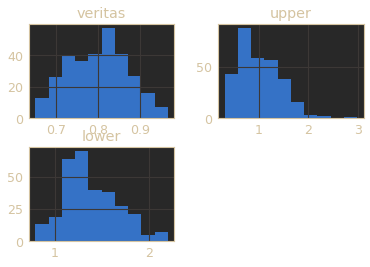

In [11]:
Rs=reveal(respjson,veritas_modelpath)
r_=[(x.get('veritas'),x.get('score'),x.get('lower_threshold')) for x in Rs[0]]
r=pd.DataFrame(r_,columns=['veritas','upper','lower'])
r.hist()

In [12]:
from distfit import distfit
from scipy.stats import t, lognorm
dfit=distfit(distr='lognorm')
dfit.fit_transform(r.lower.values)
df,loc,scale=dfit.model['params']
dist = lognorm(df, loc=loc, scale=scale)
dist.ppf(.09)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [lognorm] [0.04 sec] [RSS: 0.291401] [loc=0.260 scale=1.087]
[distfit] >INFO> Compute confidence intervals [parametric]


1.0348857139669896

In [13]:
dfitv=distfit(smooth=10,distr='lognorm')
dfitv.fit_transform(r.veritas.values)
dfv,locv,scalev=dfitv.model['params']
distv = lognorm(dfv, loc=locv, scale=scalev)
distv.ppf(1-0.015)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [smoothline] >Smoothing by interpolation..
[distfit] >INFO> [lognorm] [0.13 sec] [RSS: 17.3883] [loc=-3.780 scale=4.583]
[distfit] >INFO> Compute confidence intervals [parametric]


0.9654379224996523

In [14]:
RESULT={}
RESULT['nodx']=r[r.upper<1.22].index.size
RESULT['dx']=r.index.size-RESULT['nodx']
RESULT['malingering1'] = r[(r.upper>1.22) & (r.veritas>.81)].index.size
RESULT['malingering2'] = r[(r.lower<.9) & (r.upper>1.22)].index.size
RESULT['malingering_total'] = RESULT['malingering1']+RESULT['malingering2']

RESULT

{'nodx': 211,
 'dx': 93,
 'malingering1': 19,
 'malingering2': 6,
 'malingering_total': 25}

In [18]:
df=pd.read_csv('../data/dx2.csv',index_col=0)
DX=df[' dx'].values

In [19]:
M2=((r.lower<.9) & (r.upper>1.22)).astype(int)

In [20]:
M1=((r.upper>1.22) & (r.veritas>.81)).astype(int)

In [21]:
pd.set_option('display.max_rows', None)

DX_=(r.upper>1.47).astype(int)
xf=pd.DataFrame(DX_).assign(dx=DX).assign(M=M1+M2)
xf[(xf.dx==1) & (xf.M==1)]

,upper,dx,M
5,1,1,1
18,1,1,1
36,0,1,1
58,1,1,1
86,0,1,1
96,0,1,1
115,1,1,1
136,0,1,1
200,0,1,1
213,1,1,1


In [28]:
r

,veritas,upper,lower
0,0.783333,0.703843,1.512292
1,0.750000,0.953302,1.105381
2,0.800000,1.054708,1.538023
3,0.833333,1.330142,1.116286
4,0.900000,0.313145,1.846021
5,0.666667,1.571650,0.884690
6,0.833333,0.677136,1.355659
7,0.933333,0.617712,1.760176
8,0.766667,1.215056,1.484194
9,0.800000,1.531109,1.365912


In [22]:
xf[(xf.dx==1) & (xf.M==1)].index.size

12

In [23]:
xf[(xf.dx==0) & (xf.M==1)]

,upper,dx,M
3,0,0,1
34,0,0,1
37,0,0,1
54,0,0,1
66,0,0,1
72,1,0,1
79,0,0,1
272,1,0,1
280,0,0,1


In [24]:
xf1=xf.assign(dxpred=(~xf.M.astype(bool) & xf.upper.astype(bool)).astype(int))
xf1.corr()

,upper,dx,M,dxpred
upper,1.000000,0.325814,0.191692,0.881609
dx,0.325814,1.000000,0.169947,0.257619
M,0.191692,0.169947,1.000000,-0.102829
dxpred,0.881609,0.257619,-0.102829,1.000000


In [27]:
r.mean()

veritas    0.803299
upper      1.006994
lower      1.381254
dtype: float64

In [25]:
r

,veritas,upper,lower
0,0.783333,0.703843,1.512292
1,0.750000,0.953302,1.105381
2,0.800000,1.054708,1.538023
3,0.833333,1.330142,1.116286
4,0.900000,0.313145,1.846021
5,0.666667,1.571650,0.884690
6,0.833333,0.677136,1.355659
7,0.933333,0.617712,1.760176
8,0.766667,1.215056,1.484194
9,0.800000,1.531109,1.365912
